In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap

# read Iris data set
df = pd.read_csv('iris.csv', header = None)
df.tail()
# Setting up the data
IA = df.iloc[:,:].values
Cl = IA[:,4]
IC = np.unique(IA[:,4])
# Declaring graphing items
pltC = ('red', 'blue', 'green')
pltM = ('o', 'x', '*')
IrisF=("sepal length in cm", "sepal width in cm", "petal length in cm", "petal width in cm")


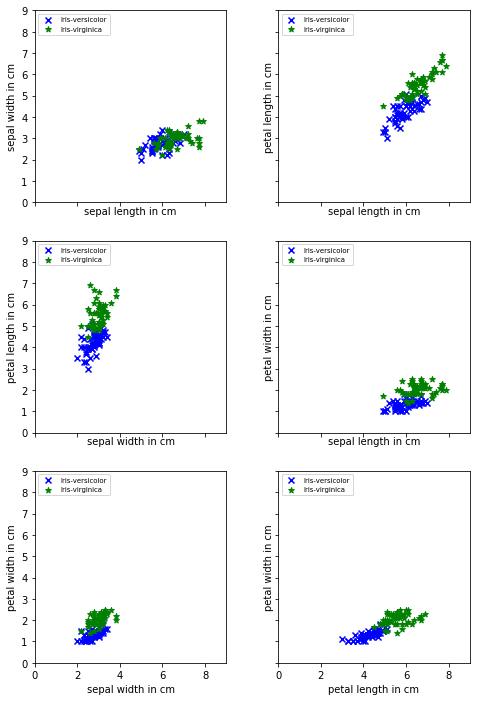

In [131]:
# Plotting the 6 cases when using only 2 features
plt.close('all')
fig, ax = plt.subplots(nrows=3, ncols=2, figsize= (8,12), sharex=True, sharey=True)

i = 0
k = 0
k1 = 0
k2 = 0
while i < 4:
    yF = IrisF[i]
    j = 0
    while j < i:
        k1 = k//2
        k2 = k%2
        xF = IrisF[j]
        # The two lines below are for Iris-setosa, in this assignment we will only focus on versicolor + virginica
        #ax[k1,k2].scatter(x=IA[Cl == IC[0], j], y=IA[Cl == IC[0], i], color=pltC[0], 
        #                  marker=pltM[0], label=IC[0])
        ax[k1,k2].scatter(x=IA[Cl == IC[1], j], y=IA[Cl == IC[1], i], color=pltC[1], 
                          marker=pltM[1], label=IC[1])
        ax[k1,k2].scatter(x=IA[Cl == IC[2], j], y=IA[Cl == IC[2], i], color=pltC[2], 
                          marker=pltM[2], label=IC[2])
        ax[k1,k2].set(aspect='equal')
        ax[k1,k2].set_xlim([0,9])
        ax[k1,k2].set_ylim([0,9])
        ax[k1,k2].set_xlabel(xF)
        ax[k1,k2].set_ylabel(yF)
        ax[k1,k2].legend(loc='upper left', fontsize='x-small')
        j += 1
        k += 1
    i += 1
plt.show()    

In [132]:
# This is the class we will use to learn the 
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Code from "Python Machine Learning," Sebastian Raschka, Packt Publishing, 2015,
    with modifications.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """ Calculate net input """
        return (np.dot(X, self.w_[1:]) + self.w_[0])

    def activation(self, X):
        """ Compute linear activation """
        return self.net_input(X)

    def predict(self, X):
        """ Return class label after unit step """
        return np.where(self.activation(X) >= 0.0, 1, -1) 
    
    def accuracy(self, X, y):
        """ Return accuracy of the model """
        return (1.0 - abs(y - self.predict(X)).sum() / (2.0 * y.size))

Part 1: Train 6 cases using 2 features for each case
# Case 1: Sepal length & Petal Length - Ongoing


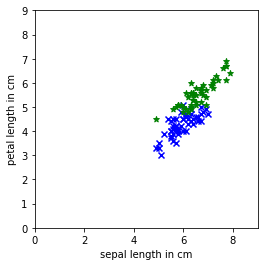

In [133]:
# Using two features create train the adaline learning model for all six cases 
print("Part 1: Train 6 cases using 2 features for each case")
print("# Case 1: Sepal length & Petal Length - Ongoing")
plt.close('all')
fig, ax = plt.subplots(figsize= (4,4), sharex=True, sharey=True)
ax.scatter(x=IA[Cl == IC[1], 0], y=IA[Cl == IC[1], 2], color=pltC[1], marker=pltM[1], label=IC[1]) 
ax.scatter(x=IA[Cl == IC[2], 0], y=IA[Cl == IC[2], 2], color=pltC[2], marker=pltM[2], label=IC[2])
ax.set_xlim([0,9])
ax.set_ylim([0,9])
ax.set_xlabel("sepal length in cm")
ax.set_ylabel("petal length in cm")
plt.show()

In [134]:
# Using two features create train the adaline learning model for all six cases 
print("Part 1: Case 1 - Sepal length & Petal Length")
# Case 1: Sepal length & Petal Length - Ongoing
cdx = np.array([1,2]) # Focusing on the classifications of "versicolor" and "verginica", class indexes 1 and 2
fdx = np.array([0,2]) # focus on the features "sepal length" and "petal length", feature indexes 0 and 2

i = 0
numCl = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:
        numCl += 1
    if Cl[i] == IC[cdx[1]]:
        numCl += 1    
    i += 1  
    
NC = np.zeros((numCl))
NF = np.zeros((numCl, 2))

i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:        
        NC[j] = 1
        NF[j,0] = IA[i,fdx[0]]
        NF[j,1] = IA[i,fdx[1]]
        j += 1
    if Cl[i] == IC[cdx[1]]:      
        NC[j] = -1
        NF[j,0] = IA[i,fdx[0]]
        NF[j,1] = IA[i,fdx[1]]
        j += 1
    i += 1

Part 1: Case 1 - Sepal length & Petal Length


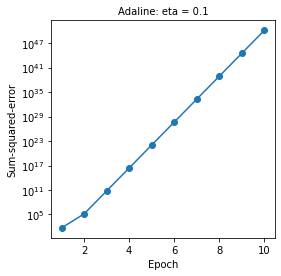

In [135]:
# Case 1: Sepal length & Petal length - Ongoing
# Checking for convergence
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))
ada = AdalineGD(n_iter=10, eta=0.1).fit(NF, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.1', fontsize ='medium')
plt.show()

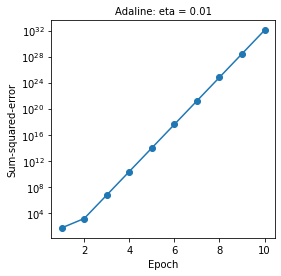

In [136]:
# Case 1: Sepal length & Petal length - Ongoing
# Since last test didnt converge checking for convergence with new learning rate
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))
ada = AdalineGD(n_iter=10, eta=0.01).fit(NF, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.01', fontsize ='medium')
plt.show()

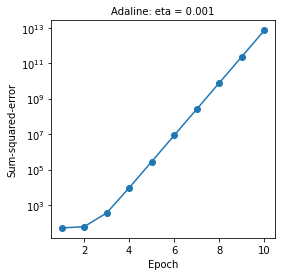

In [137]:
# Case 1: Sepal length & Petal length - Ongoing
# Since last test didnt converge checking for convergence with new learning rate
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))
ada = AdalineGD(n_iter=10, eta=0.001).fit(NF, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.001', fontsize ='medium')
plt.show()

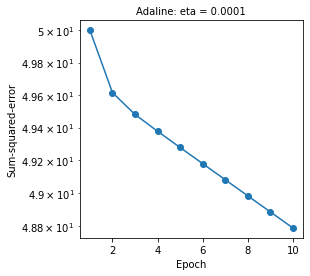

In [138]:
# Case 1: Sepal length & Petal Length - Ongoing
# Since last test didnt converge checking for convergence with new learning rate
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))
ada = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.0001', fontsize ='medium')
plt.show()

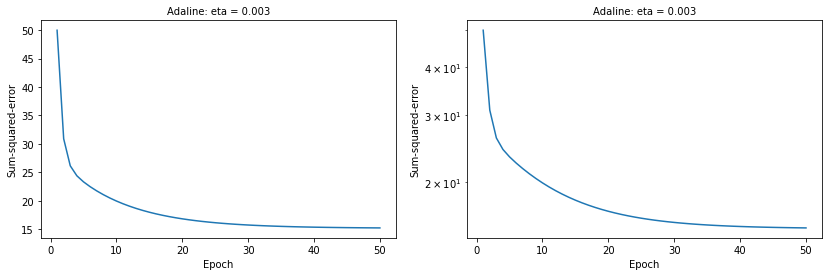

In [139]:
# Case 1: Sepal length & Petal Length - Ongoing
# Converged so now we can Standardize Inputs
NF_Std = np.copy(NF)
NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (14,4))

ada = AdalineGD(n_iter=50, eta=0.003)
ada.fit(NF_Std, NC)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

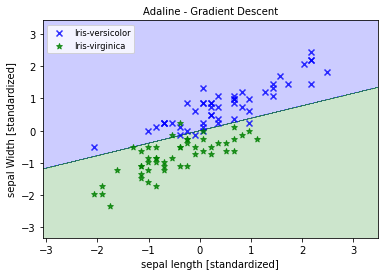

In [140]:
# Case 1: Sepal length & Petal Length - Ongoing
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.01):

    # setup marker generator and color map
    colors = ('blue', 'green')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=pltC[cdx[idx]],
                    marker=pltM[cdx[idx]], label=IC[cdx[idx]])
        
plot_decision_regions(NF_Std, NC, classifier = ada)
plt.title('Adaline - Gradient Descent', fontsize='medium')
plt.xlabel('sepal length [standardized]')
plt.ylabel('sepal Width [standardized]')
plt.legend(loc='upper left', fontsize='small')
plt.show()

In [141]:
# Case 1: Sepal length & Sepal Width
print("Case 1: Sepal length & Sepal Width - Completed | Accuracy =", ada.accuracy(NF_Std, NC))

Case 1: Sepal length & Sepal Width - Completed | Accuracy = 0.94


Part 1: Train 6 cases using 2 features for each case
Case 1: Sepal Length & Petal length - Completed - 94% Accuracy
Case 2: Sepal Length & Sepal Width - Ongoing


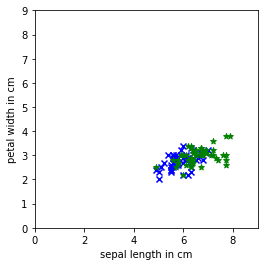

In [142]:
# Using two features create train the adaline learning model for all six cases 
# Case 1: Sepal length & Petal length - Completed
# Case 2 Sepal Length & Sepal Width - Ongoing
print("Part 1: Train 6 cases using 2 features for each case")
print("Case 1: Sepal Length & Petal length - Completed - 94% Accuracy")
print("Case 2: Sepal Length & Sepal Width - Ongoing")
plt.close('all')
fig, ax = plt.subplots(figsize= (4,4), sharex=True, sharey=True)
ax.scatter(x=IA[Cl == IC[1], 0], y=IA[Cl == IC[1], 1], color=pltC[1], marker=pltM[1], label=IC[1]) 
ax.scatter(x=IA[Cl == IC[2], 0], y=IA[Cl == IC[2], 1], color=pltC[2], marker=pltM[2], label=IC[2])
ax.set_xlim([0,9])
ax.set_ylim([0,9])
ax.set_xlabel("sepal length in cm")
ax.set_ylabel("petal width in cm")
plt.show()

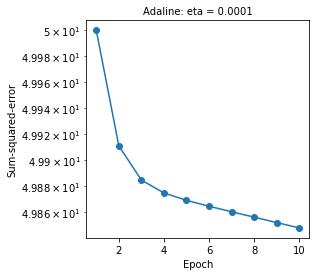

In [143]:
# Case 2 Sepal Length & Sepal Width - Ongoing
cdx = np.array([1,2]) # Focusing on the classifications of "versicolor" and "verginica", class indexes 1 and 2
fdx = np.array([0,1]) # focus on the features "sepal length" and "sepal width", feature indexes 0 and 1

i = 0
numCl = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:
        numCl += 1
    if Cl[i] == IC[cdx[1]]:
        numCl += 1    
    i += 1  
    
NC = np.zeros((numCl))
NF = np.zeros((numCl, 2))

i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:        
        NC[j] = 1
        NF[j,0] = IA[i,fdx[0]]
        NF[j,1] = IA[i,fdx[1]]
        j += 1
    if Cl[i] == IC[cdx[1]]:      
        NC[j] = -1
        NF[j,0] = IA[i,fdx[0]]
        NF[j,1] = IA[i,fdx[1]]
        j += 1
    i += 1
    
# Checking if the previously used learning rate converges
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))
ada = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.0001', fontsize ='medium')
plt.show()

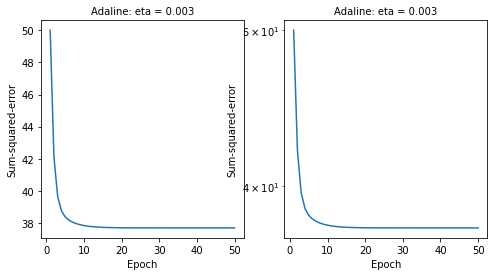

In [144]:
# Case 2 Sepal Length & Sepal Width - Ongoing
# Converged so now we can Standardize Inputs
NF_Std = np.copy(NF)
NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=50, eta=0.003)
ada.fit(NF_Std, NC)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

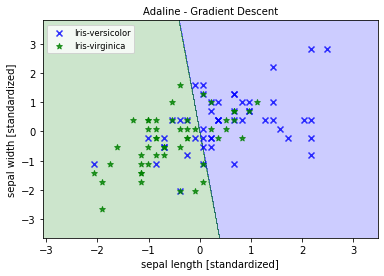

In [145]:
# Case 2 Sepal Length & Sepal Width - Ongoing
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.01):

    # setup marker generator and color map
    colors = ('blue', 'green')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=pltC[cdx[idx]],
                    marker=pltM[cdx[idx]], label=IC[cdx[idx]])

plot_decision_regions(NF_Std, NC, classifier = ada)
plt.title('Adaline - Gradient Descent', fontsize='medium')
plt.xlabel('sepal length [standardized]')
plt.ylabel('sepal width [standardized]')
plt.legend(loc='upper left', fontsize='small')
plt.show()

In [146]:
# Case 2 Sepal Length & Sepal Width - Completed
print("Case 1: Sepal Length & Petal length - Completed | Accuracy = 94%")
print("Case 2: Sepal Length & Sepal Width - Completed | Accuracy =", ada.accuracy(NF_Std, NC))

Case 1: Sepal Length & Petal length - Completed | Accuracy = 94%
Case 2: Sepal Length & Sepal Width - Completed | Accuracy = 0.75


Part 1: Train 6 cases using 2 features for each case
Case 1: Sepal Length & Petal length - Completed - 94% Accuracy
Case 2: Sepal Length & Sepal Width - Completed - 75% accuracy
Case 3: Sepal Length & Petal Width - Ongoing


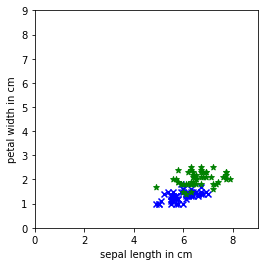

In [147]:
# Using two features create train the adaline learning model for all six cases 
# Case 1: Sepal Length & Petal length - Completed
# Case 2: Sepal Length & Sepal Width - Completed
# Case 3: Sepal Length & Petal Width - Ongoing 
print("Part 1: Train 6 cases using 2 features for each case")
print("Case 1: Sepal Length & Petal length - Completed - 94% Accuracy")
print("Case 2: Sepal Length & Sepal Width - Completed - 75% accuracy")
print("Case 3: Sepal Length & Petal Width - Ongoing")
plt.close('all')
fig, ax = plt.subplots(figsize= (4,4), sharex=True, sharey=True)
ax.scatter(x=IA[Cl == IC[1], 0], y=IA[Cl == IC[1], 3], color=pltC[1], marker=pltM[1], label=IC[1]) 
ax.scatter(x=IA[Cl == IC[2], 0], y=IA[Cl == IC[2], 3], color=pltC[2], marker=pltM[2], label=IC[2])
ax.set_xlim([0,9])
ax.set_ylim([0,9])
ax.set_xlabel("sepal length in cm")
ax.set_ylabel("petal width in cm")
plt.show()

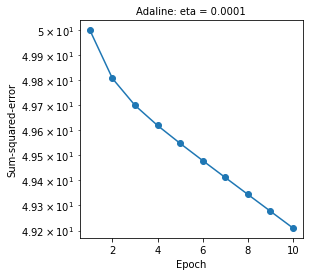

In [148]:
# Case 3: Sepal Length & Petal Width - Ongoing 
cdx = np.array([1,2]) # Focusing on the classifications of "versicolor" and "verginica", class indexes 1 and 2
fdx = np.array([0,3]) # focus on the features "sepal length" and "sepal width", feature indexes 0 and 1

i = 0
numCl = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:
        numCl += 1
    if Cl[i] == IC[cdx[1]]:
        numCl += 1    
    i += 1  
    
NC = np.zeros((numCl))
NF = np.zeros((numCl, 2))

i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:        
        NC[j] = 1
        NF[j,0] = IA[i,fdx[0]]
        NF[j,1] = IA[i,fdx[1]]
        j += 1
    if Cl[i] == IC[cdx[1]]:      
        NC[j] = -1
        NF[j,0] = IA[i,fdx[0]]
        NF[j,1] = IA[i,fdx[1]]
        j += 1
    i += 1
    
# Checking if the previously used learning rate converges
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))
ada = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.0001', fontsize ='medium')
plt.show()

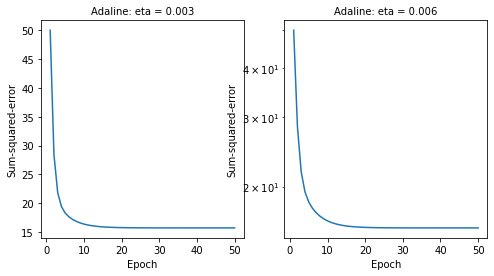

In [149]:
# Case 3: Sepal Length & Petal Width - Ongoing 
# Converged so now we can Standardize Inputs
NF_Std = np.copy(NF)
NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=50, eta=0.003)
ada.fit(NF_Std, NC)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.006', fontsize='medium')
plt.show()

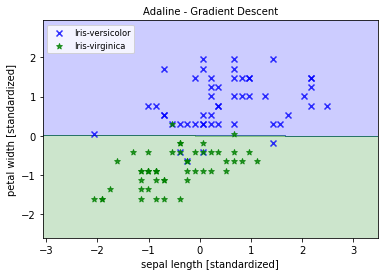

In [150]:
# Case 3: Sepal Length & Petal Width - Ongoing 
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.01):

    # setup marker generator and color map
    colors = ('blue', 'green')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=pltC[cdx[idx]],
                    marker=pltM[cdx[idx]], label=IC[cdx[idx]])

plot_decision_regions(NF_Std, NC, classifier = ada)
plt.title('Adaline - Gradient Descent', fontsize='medium')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left', fontsize='small')
plt.show()

In [151]:
# Case 3: Sepal Length & Petal Width - Ongoing 
print("Case 1: Sepal Length & Petal length - Completed - 94% Accuracy")
print("Case 2: Sepal Length & Sepal Width - Completed - 75% accuracy")
print("Case 3: Sepal Length & Petal Width - Ongoing", ada.accuracy(NF_Std, NC))

Case 1: Sepal Length & Petal length - Completed - 94% Accuracy
Case 2: Sepal Length & Sepal Width - Completed - 75% accuracy
Case 3: Sepal Length & Petal Width - Ongoing 0.94


Part 1: Train 6 cases using 2 features for each case
Case 1: Sepal Length & Petal length - Completed | 94% Accuracy
Case 2: Sepal Length & Sepal Width - Completed | 75% Accuracy
Case 3: Sepal Length & Petal Width - Completed | 94% Accuracy
Case 4: Sepal Width & Petal Length - Ongoing


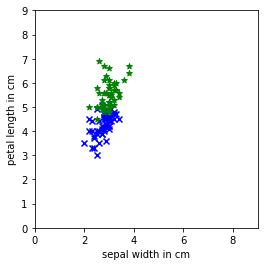

In [152]:
# Using two features create train the adaline learning model for all six cases 
# Case 1: Sepal Length & Petal length - Completed
# Case 2: Sepal Length & Sepal Width - Completed
# Case 3: Sepal Length & Petal Width - Completed
# Case 4: Sepal Width & Petal Length - Ongoing
print("Part 1: Train 6 cases using 2 features for each case")
print("Case 1: Sepal Length & Petal length - Completed | 94% Accuracy")
print("Case 2: Sepal Length & Sepal Width - Completed | 75% Accuracy")
print("Case 3: Sepal Length & Petal Width - Completed | 94% Accuracy")
print("Case 4: Sepal Width & Petal Length - Ongoing")
plt.close('all')
fig, ax = plt.subplots(figsize= (4,4), sharex=True, sharey=True)
ax.scatter(x=IA[Cl == IC[1], 1], y=IA[Cl == IC[1], 2], color=pltC[1], marker=pltM[1], label=IC[1]) 
ax.scatter(x=IA[Cl == IC[2], 1], y=IA[Cl == IC[2], 2], color=pltC[2], marker=pltM[2], label=IC[2])
ax.set_xlim([0,9])
ax.set_ylim([0,9])
ax.set_xlabel("sepal width in cm")
ax.set_ylabel("petal length in cm")
plt.show()

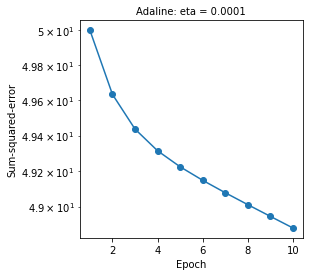

In [153]:
# Case 4: Sepal Width & Petal Length - Ongoing
cdx = np.array([1,2]) # Focusing on the classifications of "versicolor" and "verginica", class indexes 1 and 2
fdx = np.array([1,2]) # focus on the features "sepal length" and "sepal width", feature indexes 0 and 1

i = 0
numCl = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:
        numCl += 1
    if Cl[i] == IC[cdx[1]]:
        numCl += 1    
    i += 1  
    
NC = np.zeros((numCl))
NF = np.zeros((numCl, 2))

i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:        
        NC[j] = 1
        NF[j,0] = IA[i,fdx[0]]
        NF[j,1] = IA[i,fdx[1]]
        j += 1
    if Cl[i] == IC[cdx[1]]:      
        NC[j] = -1
        NF[j,0] = IA[i,fdx[0]]
        NF[j,1] = IA[i,fdx[1]]
        j += 1
    i += 1
    
# Checking if the previously used learning rate converges
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))
ada = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.0001', fontsize ='medium')
plt.show()

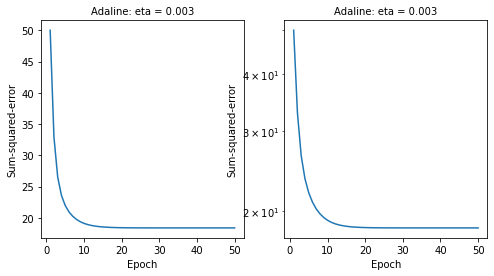

In [154]:
# Case 4: Sepal Width & Petal Length - Ongoing
# Converged so now we can Standardize Inputs
NF_Std = np.copy(NF)
NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=50, eta=0.003)
ada.fit(NF_Std, NC)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

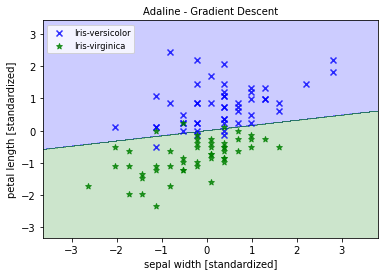

In [155]:
# Case 4: Sepal Width & Petal Length - Ongoing
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.01):

    # setup marker generator and color map
    colors = ('blue', 'green')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=pltC[cdx[idx]],
                    marker=pltM[cdx[idx]], label=IC[cdx[idx]])

plot_decision_regions(NF_Std, NC, classifier = ada)
plt.title('Adaline - Gradient Descent', fontsize='medium')
plt.xlabel('sepal width [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left', fontsize='small')
plt.show()

In [156]:
# Case 4: Sepal Width & Petal Length - Ongoing
print("Part 1: Train 6 cases using 2 features for each case")
print("Case 1: Sepal Length & Petal length - Completed | 94% Accuracy")
print("Case 2: Sepal Length & Sepal Width - Completed | 75% Accuracy")
print("Case 3: Sepal Length & Petal Width - Completed | 94% Accuracy")
print("Case 4: Sepal Width & Petal Length - Completed | Accuracy =", ada.accuracy(NF_Std, NC))

Part 1: Train 6 cases using 2 features for each case
Case 1: Sepal Length & Petal length - Completed | 94% Accuracy
Case 2: Sepal Length & Sepal Width - Completed | 75% Accuracy
Case 3: Sepal Length & Petal Width - Completed | 94% Accuracy
Case 4: Sepal Width & Petal Length - Completed | Accuracy = 0.9299999999999999


Part 1: Train 6 cases using 2 features for each case
Case 1: Sepal Length & Petal length - Completed | 94% Accuracy
Case 2: Sepal Length & Sepal Width - Completed | 75% Accuracy
Case 3: Sepal Length & Petal Width - Completed | 94% Accuracy
Case 4: Sepal Width & Petal Length - Completed | 93% Accuracy
Case 5: Sepal Width & Petal Width - Ongoing


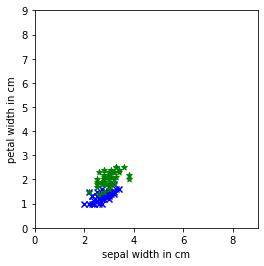

In [157]:
# Using two features create train the adaline learning model for all six cases 
# Case 1: Sepal Length & Petal length - Completed
# Case 2: Sepal Length & Sepal Width - Completed
# Case 3: Sepal Length & Petal Width - Completed
# Case 4: Sepal Width & Petal Length - Completed
# Case 5: Sepal Width & Petal Width - Ongoing
print("Part 1: Train 6 cases using 2 features for each case")
print("Case 1: Sepal Length & Petal length - Completed | 94% Accuracy")
print("Case 2: Sepal Length & Sepal Width - Completed | 75% Accuracy")
print("Case 3: Sepal Length & Petal Width - Completed | 94% Accuracy")
print("Case 4: Sepal Width & Petal Length - Completed | 93% Accuracy")
print("Case 5: Sepal Width & Petal Width - Ongoing")
plt.close('all')
fig, ax = plt.subplots(figsize= (4,4), sharex=True, sharey=True)
ax.scatter(x=IA[Cl == IC[1], 1], y=IA[Cl == IC[1], 3], color=pltC[1], marker=pltM[1], label=IC[1]) 
ax.scatter(x=IA[Cl == IC[2], 1], y=IA[Cl == IC[2], 3], color=pltC[2], marker=pltM[2], label=IC[2])
ax.set_xlim([0,9])
ax.set_ylim([0,9])
ax.set_xlabel("sepal width in cm")
ax.set_ylabel("petal width in cm")
plt.show()

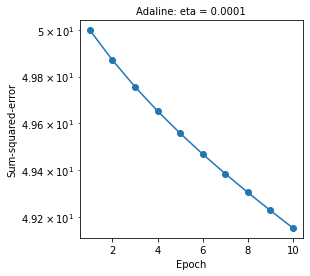

In [158]:
# Case 5: Sepal Width & Petal Width - Ongoing
cdx = np.array([1,2]) # Focusing on the classifications of "versicolor" and "verginica", class indexes 1 and 2
fdx = np.array([1,3]) # focus on the features "sepal length" and "sepal width", feature indexes 0 and 1

i = 0
numCl = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:
        numCl += 1
    if Cl[i] == IC[cdx[1]]:
        numCl += 1    
    i += 1  
    
NC = np.zeros((numCl))
NF = np.zeros((numCl, 2))

i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:        
        NC[j] = 1
        NF[j,0] = IA[i,fdx[0]]
        NF[j,1] = IA[i,fdx[1]]
        j += 1
    if Cl[i] == IC[cdx[1]]:      
        NC[j] = -1
        NF[j,0] = IA[i,fdx[0]]
        NF[j,1] = IA[i,fdx[1]]
        j += 1
    i += 1
    
# Checking if the previously used learning rate converges 
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))
ada = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.0001', fontsize ='medium')
plt.show()

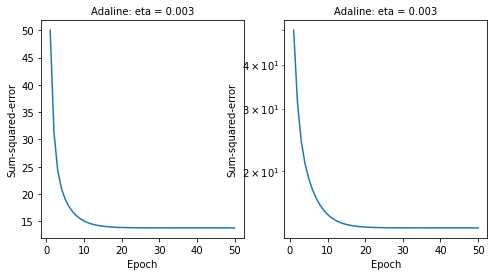

In [159]:
# Case 5: Sepal Width & Petal Width - Ongoing
# Converged so now we can Standardize Inputs
NF_Std = np.copy(NF)
NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=50, eta=0.003)
ada.fit(NF_Std, NC)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

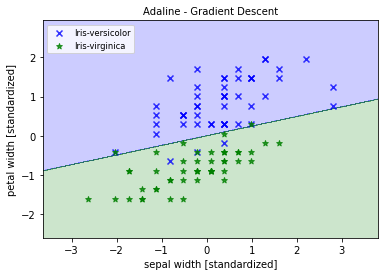

In [160]:
# Case 5: Sepal Width & Petal Width - Ongoing
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.01):

    # setup marker generator and color map
    colors = ('blue', 'green')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=pltC[cdx[idx]],
                    marker=pltM[cdx[idx]], label=IC[cdx[idx]])

plot_decision_regions(NF_Std, NC, classifier = ada)
plt.title('Adaline - Gradient Descent', fontsize='medium')
plt.xlabel('sepal width [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left', fontsize='small')
plt.show()

In [161]:
# Case 5: Sepal Width & Petal Width - Ongoing
print("Part 1: Train 6 cases using 2 features for each case")
print("Case 1: Sepal Length & Petal length - Completed | 94% Accuracy")
print("Case 2: Sepal Length & Sepal Width - Completed | 75% Accuracy")
print("Case 3: Sepal Length & Petal Width - Completed | 94% Accuracy")
print("Case 4: Sepal Width & Petal Length - Completed | 93% Accuracy")
print("Case 5: Sepal Width & Petal Width - Completed | Accuracy =", ada.accuracy(NF_Std, NC))

Part 1: Train 6 cases using 2 features for each case
Case 1: Sepal Length & Petal length - Completed | 94% Accuracy
Case 2: Sepal Length & Sepal Width - Completed | 75% Accuracy
Case 3: Sepal Length & Petal Width - Completed | 94% Accuracy
Case 4: Sepal Width & Petal Length - Completed | 93% Accuracy
Case 5: Sepal Width & Petal Width - Completed | Accuracy = 0.95


Part 1: Train 6 cases using 2 features for each case
Case 1: Sepal Length & Petal length - Completed | 94% Accuracy
Case 2: Sepal Length & Sepal Width - Completed | 75% Accuracy
Case 3: Sepal Length & Petal Width - Completed | 94% Accuracy
Case 4: Sepal Width & Petal Length - Completed | 93% Accuracy
Case 5: Sepal Width & Petal Width - Completed | 95% Accuracy
Case 6: Petal Length & Petal Width - Ongoing


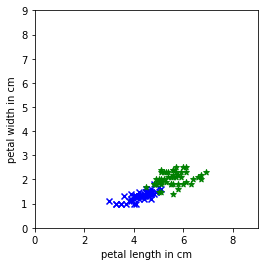

In [162]:
# Using two features create train the adaline learning model for all six cases 
# Case 1: Sepal Length & Petal length - Completed
# Case 2: Sepal Length & Sepal Width - Completed
# Case 3: Sepal Length & Petal Width - Completed
# Case 4: Sepal Width & Petal Length - Completed
# Case 5: Sepal Width & Petal Width - Completed
# Case 6: Petal Length & Petal Width - Ongoing
print("Part 1: Train 6 cases using 2 features for each case")
print("Case 1: Sepal Length & Petal length - Completed | 94% Accuracy")
print("Case 2: Sepal Length & Sepal Width - Completed | 75% Accuracy")
print("Case 3: Sepal Length & Petal Width - Completed | 94% Accuracy")
print("Case 4: Sepal Width & Petal Length - Completed | 93% Accuracy")
print("Case 5: Sepal Width & Petal Width - Completed | 95% Accuracy") 
print("Case 6: Petal Length & Petal Width - Ongoing")
plt.close('all')
fig, ax = plt.subplots(figsize= (4,4), sharex=True, sharey=True)
ax.scatter(x=IA[Cl == IC[1], 2], y=IA[Cl == IC[1], 3], color=pltC[1], marker=pltM[1], label=IC[1]) 
ax.scatter(x=IA[Cl == IC[2], 2], y=IA[Cl == IC[2], 3], color=pltC[2], marker=pltM[2], label=IC[2])
ax.set_xlim([0,9])
ax.set_ylim([0,9])
ax.set_xlabel("petal length in cm")
ax.set_ylabel("petal width in cm")
plt.show()

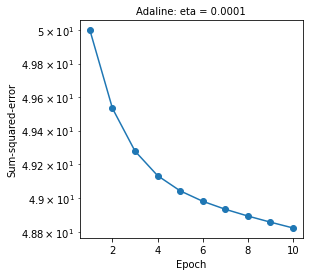

In [163]:
# Case 6: Petal Length & Petal Width - Ongoing
cdx = np.array([1,2]) # Focusing on the classifications of "versicolor" and "verginica", class indexes 1 and 2
fdx = np.array([2,3]) # focus on the features "sepal length" and "sepal width", feature indexes 0 and 1

i = 0
numCl = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:
        numCl += 1
    if Cl[i] == IC[cdx[1]]:
        numCl += 1    
    i += 1  
    
NC = np.zeros((numCl))
NF = np.zeros((numCl, 2))

i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:        
        NC[j] = 1
        NF[j,0] = IA[i,fdx[0]]
        NF[j,1] = IA[i,fdx[1]]
        j += 1
    if Cl[i] == IC[cdx[1]]:      
        NC[j] = -1
        NF[j,0] = IA[i,fdx[0]]
        NF[j,1] = IA[i,fdx[1]]
        j += 1
    i += 1
    
# Checking if the previously used learning rate converges  
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))
ada = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.0001', fontsize ='medium')
plt.show()

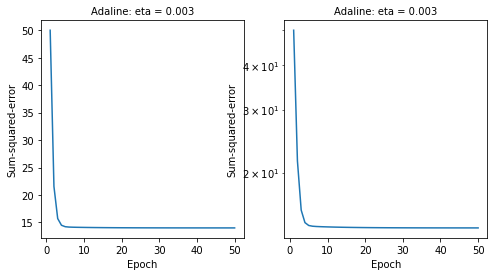

In [164]:
# Case 6: Petal Length & Petal Width - Ongoing
# Converged so now we can Standardize Inputs
NF_Std = np.copy(NF)
NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=50, eta=0.003)
ada.fit(NF_Std, NC)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

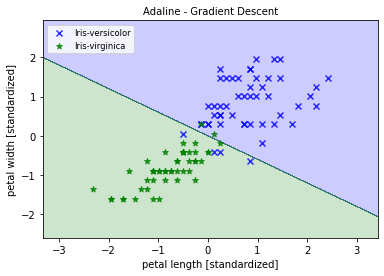

In [165]:
# Case 6: Petal Length & Petal Width - Ongoing
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.01):

    # setup marker generator and color map
    colors = ('blue', 'green')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=pltC[cdx[idx]],
                    marker=pltM[cdx[idx]], label=IC[cdx[idx]])

plot_decision_regions(NF_Std, NC, classifier = ada)
plt.title('Adaline - Gradient Descent', fontsize='medium')
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left', fontsize='small')
plt.show()

In [166]:
# Case 6: Petal Length & Petal Width - Ongoing
print("Part 1: Train 6 cases using 2 features for each case")
print("Case 1: Sepal Length & Petal length - Completed | 94% Accuracy")
print("Case 2: Sepal Length & Sepal Width - Completed | 75% Accuracy")
print("Case 3: Sepal Length & Petal Width - Completed | 94% Accuracy")
print("Case 4: Sepal Width & Petal Length - Completed | 93% Accuracy")
print("Case 5: Sepal Width & Petal Width - Completed | 95% Accuracy") 
print("Case 6: Petal Length & Petal Width - Completed | Accuracy =", ada.accuracy(NF_Std, NC))
print("Part 1: Completed")

Part 1: Train 6 cases using 2 features for each case
Case 1: Sepal Length & Petal length - Completed | 94% Accuracy
Case 2: Sepal Length & Sepal Width - Completed | 75% Accuracy
Case 3: Sepal Length & Petal Width - Completed | 94% Accuracy
Case 4: Sepal Width & Petal Length - Completed | 93% Accuracy
Case 5: Sepal Width & Petal Width - Completed | 95% Accuracy
Case 6: Petal Length & Petal Width - Completed | Accuracy = 0.94
Part 1: Completed


Part 2: Train 4 cases using only 3 features
Case 1: Sepal Length & Sepal Width & Petal Length
Case 2: Sepal Length & Sepal Width & Petal Width
Case 3: Sepal Length & Petal Length & Petal Width
Case 4: Petal Length & Petal Width & Sepal Width

Case 1:    			  Case 2:


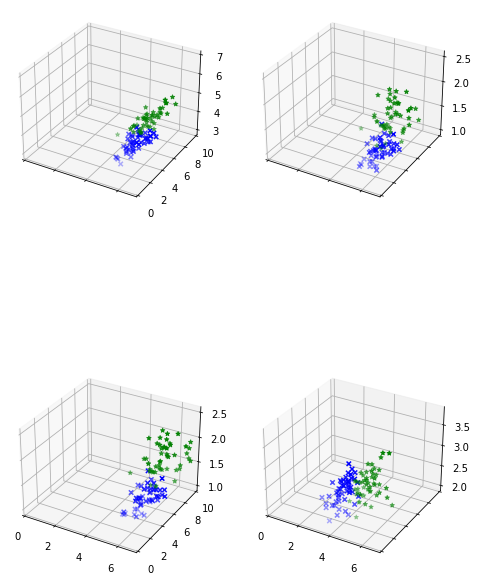

Case 3:    			  Case 4:


In [167]:
# Plotting the 4 cases when using only 3 features
print("Part 2: Train 4 cases using only 3 features")
print("Case 1: Sepal Length & Sepal Width & Petal Length")
print("Case 2: Sepal Length & Sepal Width & Petal Width")
print("Case 3: Sepal Length & Petal Length & Petal Width")
print("Case 4: Petal Length & Petal Width & Sepal Width\n")
plt.close('all')
fig, ax = plt.subplots(nrows=2, ncols=2, figsize= (8,12), subplot_kw=dict(projection='3d'), sharex=True, sharey=True)

print("Case 1:    \t\t\t  Case 2:")
# Case 1: Sepal Length & Sepal Width & Petal Length
ax[0,0].scatter(IA[Cl == IC[1], 0], IA[Cl == IC[1], 1], IA[Cl == IC[1], 2], color=pltC[1], marker=pltM[1], label=IC[1])
ax[0,0].scatter(IA[Cl == IC[2], 0], IA[Cl == IC[2], 1], IA[Cl == IC[2], 2], color=pltC[2], marker=pltM[2], label=IC[2])
# Case 2: Sepal Length & Sepal Width & Petal Width
ax[0,1].scatter(IA[Cl == IC[1], 0], IA[Cl == IC[1], 1], IA[Cl == IC[1], 3], color=pltC[1], marker=pltM[1], label=IC[1])
ax[0,1].scatter(IA[Cl == IC[2], 0], IA[Cl == IC[2], 1], IA[Cl == IC[2], 3], color=pltC[2], marker=pltM[2], label=IC[2])
# Case 3: Sepal Length & Petal Length & Petal Width
ax[1,0].set_ylim3d(0, 10)
ax[1,0].scatter(IA[Cl == IC[1], 0], IA[Cl == IC[1], 2], IA[Cl == IC[1], 3], color=pltC[1], marker=pltM[1], label=IC[1])
ax[1,0].scatter(IA[Cl == IC[2], 0], IA[Cl == IC[2], 2], IA[Cl == IC[2], 3], color=pltC[2], marker=pltM[2], label=IC[2])
# Case 4: Petal Length & Petal Width & Sepal Width 
ax[1,1].set_xlim3d(0, 7)
ax[1,1].scatter(IA[Cl == IC[1], 2], IA[Cl == IC[1], 3], IA[Cl == IC[1], 1], color=pltC[1], marker=pltM[1], label=IC[1])
ax[1,1].scatter(IA[Cl == IC[2], 2], IA[Cl == IC[2], 3], IA[Cl == IC[2], 1], color=pltC[2], marker=pltM[2], label=IC[2])
plt.show() 
print("Case 3:    \t\t\t  Case 4:")

Part 2: Train 4 cases using only 3 features
Case 1: Sepal Length & Sepal Width & Petal Length - Ongoing


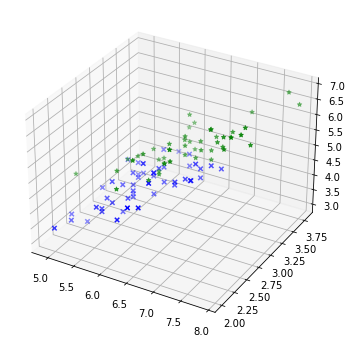

In [168]:
# Plotting the 4 cases when using only 3 feature
print("Part 2: Train 4 cases using only 3 features")
print("Case 1: Sepal Length & Sepal Width & Petal Length - Ongoing")
plt.close('all')
fig, ax = plt.subplots(figsize= (6,6), subplot_kw=dict(projection='3d'), sharex=True, sharey=True)
ax.scatter(IA[Cl == IC[1], 0], IA[Cl == IC[1], 1], IA[Cl == IC[1], 2], color=pltC[1], marker=pltM[1], label=IC[1])
ax.scatter(IA[Cl == IC[2], 0], IA[Cl == IC[2], 1], IA[Cl == IC[2], 2], color=pltC[2], marker=pltM[2], label=IC[2])
plt.show()

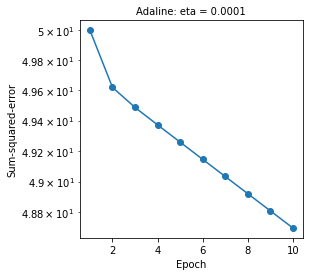

In [169]:
# Case 1: Sepal Length & Sepal Width & Petal Length
cdx = np.array([1,2]) # Focusing on the classifications of "versicolor" and "verginica", class indexes 1 and 2
fdx = np.array([0,1,2]) # focus on the features "sepal length" and "sepal width" and "petal length", feature indexes 0 and 1

i = 0
numCl = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:
        numCl += 1
    if Cl[i] == IC[cdx[1]]:
        numCl += 1    
    i += 1  
    
NC = np.zeros((numCl))
NF = np.zeros((numCl, 3))

i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:        
        NC[j] = 1
        NF[j,0] = IA[i,fdx[0]]
        NF[j,1] = IA[i,fdx[1]]
        NF[j,2] = IA[i,fdx[2]]
        j += 1
    if Cl[i] == IC[cdx[1]]:      
        NC[j] = -1
        NF[j,0] = IA[i,fdx[0]]
        NF[j,1] = IA[i,fdx[1]]
        NF[j,2] = IA[i,fdx[2]]
        j += 1
    i += 1

# Making surre that the learning rate converges
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))
ada = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.0001', fontsize ='medium')
plt.show()    

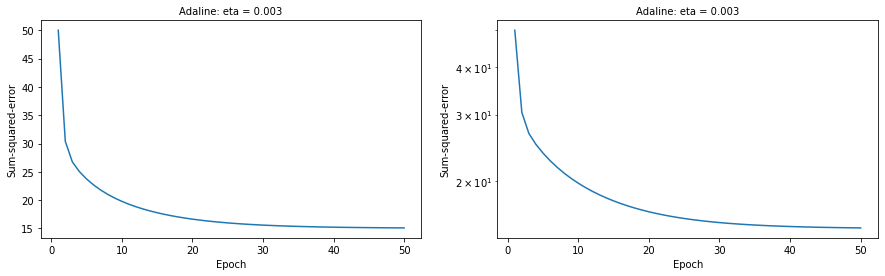

In [170]:
# Case 1: Sepal Length & Sepal Width & Petal Length
# Converged so now we can Standardize Inputs
NF_Std = np.copy(NF)
NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()
NF_Std[:,2] = (NF[:,2] - NF[:,2].mean()) / NF[:,2].std()
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (15,4))

ada = AdalineGD(n_iter=50, eta=0.003)
ada.fit(NF_Std, NC)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

In [171]:
# Case 1: Sepal Length & Sepal Width & Petal Length
print("Case 1: Sepal Length & Sepal Width & Petal Length - Completed | Accuracy =", ada.accuracy(NF_Std, NC))

Case 1: Sepal Length & Sepal Width & Petal Length - Completed | Accuracy = 0.9299999999999999


Part 2: Train 4 cases using only 3 features
Case 1: Sepal Length & Sepal Width & Petal Length - Completed | 94% Accuracy
Case 2: Sepal Length & Sepal Width & Petal Width


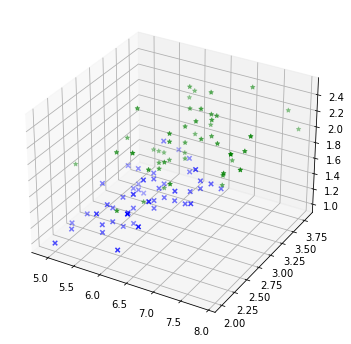

In [172]:
# Plotting the 4 cases when using only 3 feature
print("Part 2: Train 4 cases using only 3 features")
print("Case 1: Sepal Length & Sepal Width & Petal Length - Completed | 94% Accuracy")
print("Case 2: Sepal Length & Sepal Width & Petal Width")
plt.close('all')
fig, ax = plt.subplots(figsize= (6,6), subplot_kw=dict(projection='3d'), sharex=True, sharey=True)
ax.scatter(IA[Cl == IC[1], 0], IA[Cl == IC[1], 1], IA[Cl == IC[1], 3], color=pltC[1], marker=pltM[1], label=IC[1])
ax.scatter(IA[Cl == IC[2], 0], IA[Cl == IC[2], 1], IA[Cl == IC[2], 3], color=pltC[2], marker=pltM[2], label=IC[2])
plt.show()

In [173]:
# Case 2: Sepal Length & Sepal Width & Petal Width
cdx = np.array([1,2]) # Focusing on the classifications of "versicolor" and "verginica", class indexes 1 and 2
fdx = np.array([0,1,3]) # focus on the features "sepal length" and "sepal width" and "petal length", feature indexes 0 and 1

i = 0
numCl = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:
        numCl += 1
    if Cl[i] == IC[cdx[1]]:
        numCl += 1    
    i += 1  
    
NC = np.zeros((numCl))
NF = np.zeros((numCl, 3))

i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:        
        NC[j] = 1
        NF[j,0] = IA[i,fdx[0]]
        NF[j,1] = IA[i,fdx[1]]
        NF[j,2] = IA[i,fdx[2]]
        j += 1
    if Cl[i] == IC[cdx[1]]:      
        NC[j] = -1
        NF[j,0] = IA[i,fdx[0]]
        NF[j,1] = IA[i,fdx[1]]
        NF[j,2] = IA[i,fdx[2]]
        j += 1
    i += 1

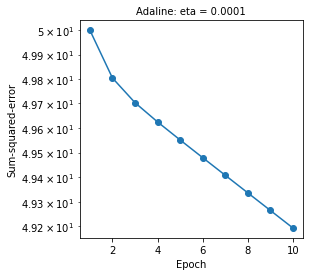

In [174]:
# Case 2: Sepal Length & Sepal Width & Petal Width
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))
ada = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.0001', fontsize ='medium')
plt.show()

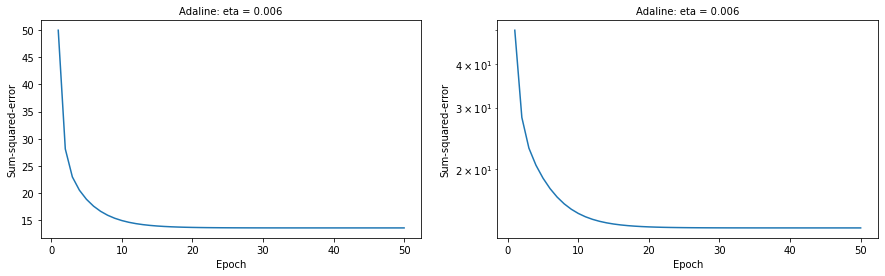

In [175]:
# Case 2: Sepal Length & Sepal Width & Petal Width
# Converged so now we can Standardize Inputs
NF_Std = np.copy(NF)
NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()
NF_Std[:,2] = (NF[:,2] - NF[:,2].mean()) / NF[:,2].std()
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (15,4))

ada = AdalineGD(n_iter=50, eta=0.003)
ada.fit(NF_Std, NC)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.006', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.006', fontsize='medium')
plt.show()

In [176]:
print("Part 2: Train 4 cases using only 3 features")
print("Case 1: Sepal Length & Sepal Width & Petal Length - Completed | 93% Accuracy")
print("Case 2: Sepal Length & Sepal Width & Petal Width - Completed | Accuracy =", ada.accuracy(NF_Std, NC))

Part 2: Train 4 cases using only 3 features
Case 1: Sepal Length & Sepal Width & Petal Length - Completed | 93% Accuracy
Case 2: Sepal Length & Sepal Width & Petal Width - Completed | Accuracy = 0.95


Part 2: Train 4 cases using only 3 features
Case 1: Sepal Length & Sepal Width & Petal Length - Completed | 93% Accuracy
Case 2: Sepal Length & Sepal Width & Petal Width - Completed | 95% Accuracy
Case 3: Sepal Length & Petal Length & Petal Width - Ongoing


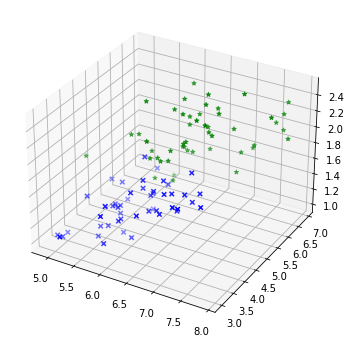

In [177]:
# Plotting the 4 cases when using only 3 feature
print("Part 2: Train 4 cases using only 3 features")
print("Case 1: Sepal Length & Sepal Width & Petal Length - Completed | 93% Accuracy")
print("Case 2: Sepal Length & Sepal Width & Petal Width - Completed | 95% Accuracy")
print("Case 3: Sepal Length & Petal Length & Petal Width - Ongoing")
plt.close('all')
fig, ax = plt.subplots(figsize= (6,6), subplot_kw=dict(projection='3d'), sharex=True, sharey=True)
ax.scatter(IA[Cl == IC[1], 0], IA[Cl == IC[1], 2], IA[Cl == IC[1], 3], color=pltC[1], marker=pltM[1], label=IC[1])
ax.scatter(IA[Cl == IC[2], 0], IA[Cl == IC[2], 2], IA[Cl == IC[2], 3], color=pltC[2], marker=pltM[2], label=IC[2])
plt.show()

In [178]:
# Case 3: Sepal Length & Petal Length & Petal Width
cdx = np.array([1,2]) # Focusing on the classifications of "versicolor" and "verginica", class indexes 1 and 2
fdx = np.array([0,2,3]) # focus on the features "sepal length" and "sepal width" and "petal length", feature indexes 0 and 1

i = 0
numCl = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:
        numCl += 1
    if Cl[i] == IC[cdx[1]]:
        numCl += 1    
    i += 1  
    
NC = np.zeros((numCl))
NF = np.zeros((numCl, 3))

i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:        
        NC[j] = 1
        NF[j,0] = IA[i,fdx[0]]
        NF[j,1] = IA[i,fdx[1]]
        NF[j,2] = IA[i,fdx[2]]
        j += 1
    if Cl[i] == IC[cdx[1]]:      
        NC[j] = -1
        NF[j,0] = IA[i,fdx[0]]
        NF[j,1] = IA[i,fdx[1]]
        NF[j,2] = IA[i,fdx[2]]
        j += 1
    i += 1

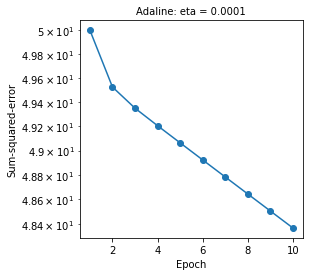

In [179]:
# Case 3: Sepal Length & Petal Length & Petal Width
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))
ada = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.0001', fontsize ='medium')
plt.show()

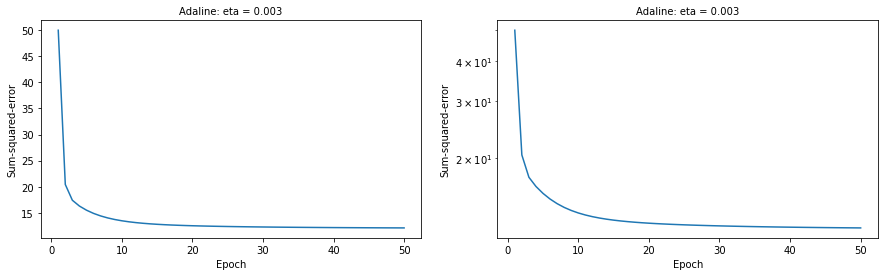

In [180]:
# Case 3: Sepal Length & Petal Length & Petal Width
# Converged so now we can Standardize Inputs
NF_Std = np.copy(NF)
NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()
NF_Std[:,2] = (NF[:,2] - NF[:,2].mean()) / NF[:,2].std()
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (15,4))

ada = AdalineGD(n_iter=50, eta=0.003)
ada.fit(NF_Std, NC)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

In [181]:
# Case 3: Sepal Length & Petal Length & Petal Width
print("Part 2: Train 4 cases using only 3 features")
print("Case 1: Sepal Length & Sepal Width & Petal Length - Completed | 93% Accuracy")
print("Case 2: Sepal Length & Sepal Width & Petal Width - Completed | 95% Accuracy")
print("Case 3: Sepal Length & Petal Length & Petal Width - Completed | Accuracy =", ada.accuracy(NF_Std, NC))

Part 2: Train 4 cases using only 3 features
Case 1: Sepal Length & Sepal Width & Petal Length - Completed | 93% Accuracy
Case 2: Sepal Length & Sepal Width & Petal Width - Completed | 95% Accuracy
Case 3: Sepal Length & Petal Length & Petal Width - Completed | Accuracy = 0.96


Part 2: Train 4 cases using only 3 features
Case 1: Sepal Length & Sepal Width & Petal Length - Completed | 93% Accuracy
Case 2: Sepal Length & Sepal Width & Petal Width - Completed | 95% Accuracy
Case 3: Sepal Length & Petal Length & Petal Width - Completed | 96% Accuracy
Case 4: Petal Length & Petal Width & Sepal Width 


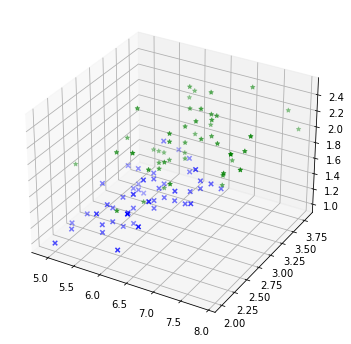

In [182]:
# Plotting the 4 cases when using only 3 feature
print("Part 2: Train 4 cases using only 3 features")
print("Case 1: Sepal Length & Sepal Width & Petal Length - Completed | 93% Accuracy")
print("Case 2: Sepal Length & Sepal Width & Petal Width - Completed | 95% Accuracy")
print("Case 3: Sepal Length & Petal Length & Petal Width - Completed | 96% Accuracy")
print("Case 4: Petal Length & Petal Width & Sepal Width ")
plt.close('all')
fig, ax = plt.subplots(figsize= (6,6), subplot_kw=dict(projection='3d'), sharex=True, sharey=True)
ax.scatter(IA[Cl == IC[1], 0], IA[Cl == IC[1], 1], IA[Cl == IC[1], 3], color=pltC[1], marker=pltM[1], label=IC[1])
ax.scatter(IA[Cl == IC[2], 0], IA[Cl == IC[2], 1], IA[Cl == IC[2], 3], color=pltC[2], marker=pltM[2], label=IC[2])
plt.show()

In [183]:
# Case 4: Petal Length & Petal Width & Sepal Width 
cdx = np.array([1,2]) # Focusing on the classifications of "versicolor" and "verginica", class indexes 1 and 2
fdx = np.array([0,1,3]) # focus on the features "sepal length" and "sepal width" and "petal length", feature indexes 0 and 1

i = 0
numCl = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:
        numCl += 1
    if Cl[i] == IC[cdx[1]]:
        numCl += 1    
    i += 1  
    
NC = np.zeros((numCl))
NF = np.zeros((numCl, 3))

i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:        
        NC[j] = 1
        NF[j,0] = IA[i,fdx[0]]
        NF[j,1] = IA[i,fdx[1]]
        NF[j,2] = IA[i,fdx[2]]
        j += 1
    if Cl[i] == IC[cdx[1]]:      
        NC[j] = -1
        NF[j,0] = IA[i,fdx[0]]
        NF[j,1] = IA[i,fdx[1]]
        NF[j,2] = IA[i,fdx[2]]
        j += 1
    i += 1

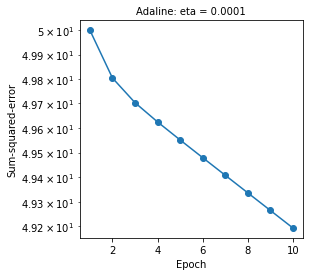

In [184]:
# Case 4: Petal Length & Petal Width & Sepal Width 
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))
ada = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.0001', fontsize ='medium')
plt.show()

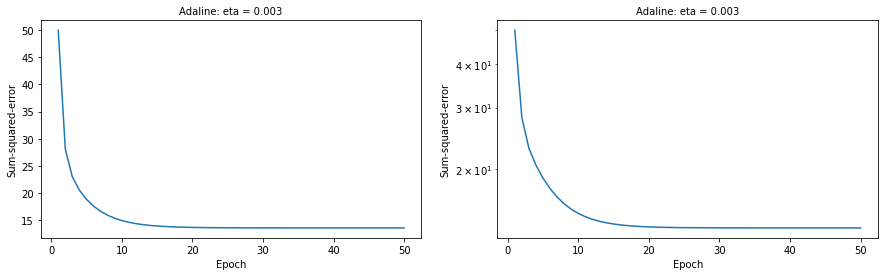

In [185]:
# Case 4: Petal Length & Petal Width & Sepal Width 
# Converged so now we can Standardize Inputs
NF_Std = np.copy(NF)
NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()
NF_Std[:,2] = (NF[:,2] - NF[:,2].mean()) / NF[:,2].std()
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (15,4))

ada = AdalineGD(n_iter=50, eta=0.003)
ada.fit(NF_Std, NC)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

In [186]:
# Case 4: Petal Length & Petal Width & Sepal Width 
print("Part 2: Train 4 cases using only 3 features")
print("Case 1: Sepal Length & Sepal Width & Petal Length - Completed | 93% Accuracy")
print("Case 2: Sepal Length & Sepal Width & Petal Width - Completed | 95% Accuracy")
print("Case 3: Sepal Length & Petal Length & Petal Width - Completed | 96% Accuracy")
print("Case 4: Petal Length & Petal Width & Sepal Width - Completed | Accuracy =", ada.accuracy(NF_Std, NC))
print("Part 2: Completed")

Part 2: Train 4 cases using only 3 features
Case 1: Sepal Length & Sepal Width & Petal Length - Completed | 93% Accuracy
Case 2: Sepal Length & Sepal Width & Petal Width - Completed | 95% Accuracy
Case 3: Sepal Length & Petal Length & Petal Width - Completed | 96% Accuracy
Case 4: Petal Length & Petal Width & Sepal Width - Completed | Accuracy = 0.95
Part 2: Completed


In [187]:
# Single case with four features being used at once
print("Part 3: Train 1 case with all 4 features")
cdx = np.array([1,2]) # Focusing on the classifications of "versicolor" and "verginica", class indexes 1 and 2
fdx = np.array([0,1,2,3]) # all features

i = 0
numCl = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:
        numCl += 1
    if Cl[i] == IC[cdx[1]]:
        numCl += 1    
    i += 1  
    
NC = np.zeros((numCl))
NF = np.zeros((numCl, 4))

i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:        
        NC[j] = 1
        NF[j,0] = IA[i,fdx[0]]
        NF[j,1] = IA[i,fdx[1]]
        NF[j,2] = IA[i,fdx[2]]
        NF[j,3] = IA[i,fdx[3]]
        j += 1
    if Cl[i] == IC[cdx[1]]:      
        NC[j] = -1
        NF[j,0] = IA[i,fdx[0]]
        NF[j,1] = IA[i,fdx[1]]
        NF[j,2] = IA[i,fdx[2]]
        NF[j,3] = IA[i,fdx[3]]
        j += 1
    i += 1

Part 3: Train 1 case with all 4 features


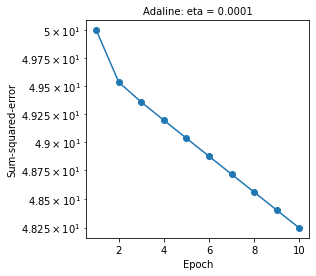

In [188]:
# Making sure converges
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))
ada = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.0001', fontsize ='medium')
plt.show()

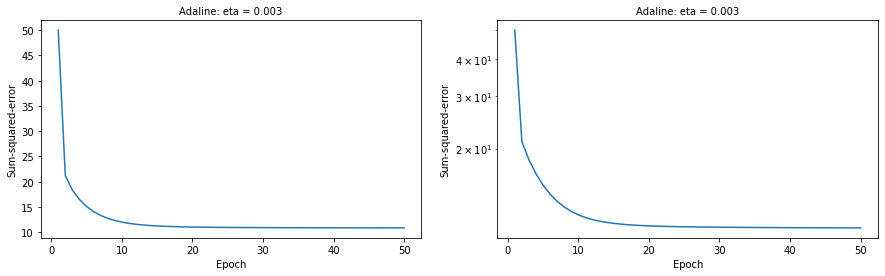

In [189]:
# Single case with four features being used at once
# Converged so now we can Standardize Inputs
NF_Std = np.copy(NF)
NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()
NF_Std[:,2] = (NF[:,2] - NF[:,2].mean()) / NF[:,2].std()
NF_Std[:,3] = (NF[:,3] - NF[:,3].mean()) / NF[:,3].std()
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (15,4))

ada = AdalineGD(n_iter=50, eta=0.003)
ada.fit(NF_Std, NC)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

In [190]:
# Single case with four features being used at once
print(ada.accuracy(NF_Std, NC))
# 97% accuracy

0.97


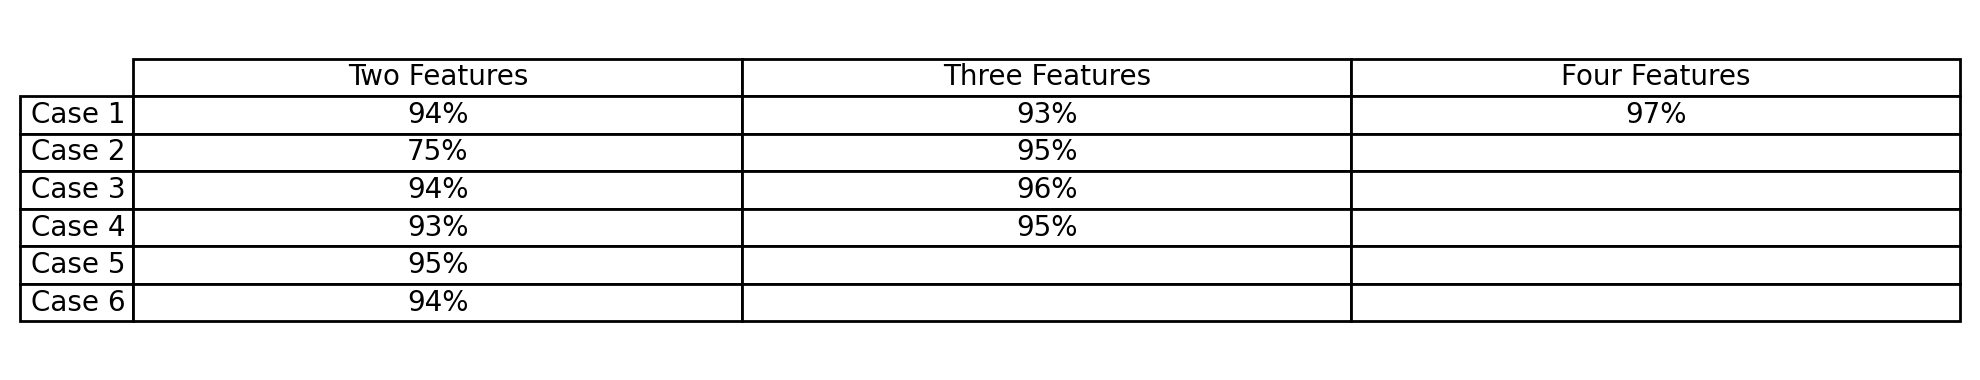

In [191]:
fig, ax = plt.subplots(dpi=200, figsize = (10,2))
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
cases=np.array(["Case 1","Case 2","Case 3","Case 4","Case 5","Case 6"])
twofeature=np.array(["94%","75%","94%","93%","95%","94%"])
tfeature=np.array(["93%","95%","96%","95%","",""])
ffeature=threefeature=np.array(["97%","","","","", ""])
df = pd.DataFrame({'Two Features' : twofeature.tolist(), 'Three Features' : tfeature.tolist(), 'Four Features' : ffeature.tolist()})
ax.table(cellText=df.values, rowLabels=cases, colLabels=df.columns, cellLoc='center', loc='center')
fig.tight_layout()
plt.show()

The table above shows all the results recorded and has an extra average section to see the average of all the cases for particular numbers of features. In addition, for the results in the table above to remain consistant the learning rate for each case remained at .003 and the number of iterations stayed at 50 throughout all the cases. The table above is purely for ease of use and is reiterared below for analysis.

Part 1: Train the Adaline learning model using the following, all six cases of using two features at a time.

Case 1: Sepal Length & Petal length | 94% Accuracy     
This case seems to have good accuracy rate let's check the other cases.  
This means the machine learning for this case performed well.  

Case 2: Sepal Length & Sepal Width  | 75% Accuracy  
This case is not very accurate, something about these two features is causing the rate of accuracy to decline.  
This means the machine learning for this case performed very poorly.  

Case 3: Sepal Length & Petal Width  | 94% Accuracy  
Unlike Case 2, this case seems to have a good accuracy just like case 1. Maybe case 2 is an outlier?  
The means the machine learning in this case also did very well.  

Case 4: Sepal Width & Petal Length  | 93% Accuracy  
This case is 1% lower than case 1 & 3 but it still has a good accuracy rate compared to case 2.  
This means that the machine learning performed slightly less well in this case.  

Case 5: Sepal Width & Petal Width   | 95% Accuracy  
This case has a very good accuracy rate, higher all the previous cases.  
This means that the machine learning did had a good performance for this case.  

Case 6: Petal Length & Petal Width  | 94% Accuracy  
Same accuracy rate as case 1 & 3. This means the machine learning for these two features went well.  
This means that this case performed well in machine learning.    

After analyzing the training results of all the cases with two features, it is realizable that generally the machine performs at adequately for most cases. However, most cases is not all the cases because clearly in case 2 where we have sepal length and sepal width we can see that it resulted in a measly 75% accuracy. The accuracy for case 2 is very low compared to the other cases using two features. This may be an issue correlating to using two features instead of more features.  

Part 2: Train the Adaline learning model using the following, all four cases of using three features at a time.  

Case 1: Sepal Length & Sepal Width & Petal Length | 93% Accuracy  
This case seems to have a good accuracy rate, 93% accuracy is decently high.  
This means the machine learning performed well in this case.  

Case 2: Sepal Length & Sepal Width & Petal Width  | 95% Accuracy  
This case seems to have a very good accuracy rate, 95% accuracy is a high rate.  
This means the machine learning performed good in this case.  

Case 3: Sepal Length & Petal Length & Petal Width | 96% Accuracy  
This case has a very good accuracy rate, a higher accuracy than the previous 2 cases.  
This means the machine learning performed very good in this case.  

Case 4: Petal Length & Petal Width & Sepal Width  | 95% Accuracy  
This case has the same accurate rate as case 2, the accuracy rate is pretty good.  
This means the machine learning performed well for this case.  

After analyzing the training results of all the cases with three features, it is realizable that the results of training 3 features is generally higher or at least equal than the results of training with 2 features. In all the four cases of training with 3 features the accuracy rates are generally high 93% and above, but the accuracy rate for two feature is not generally high because one case is at a measly 75% accuracy. Take for example, the highest when using 3 features is 96% while the highest while using 2 features is only 95%. Also to reiterate the lowest when using 3 features is 93% while the lowest using 2 features is 75%. This shows that using 3 features is better than using 2 features most of the time because when using 3 features the results show that we have higher lows and higher highs than when compared to 2 features.

Part 3: Train the Adaline learning model using the following, one case with four features at a time.  

Case 1: Sepal Length & Sepal Width & Petal Length & Petal Width | 97% Accuracy  
This case performed the highest accuracy rate out of all the cases.
This means that the machine learning performed exceptionally well for this case.

After analyzing the training results of the case with four features, it is realizable that the results of training 4 features has the highest accuracy rate out of all the cases performed. In addition we realize a particular trend, as the number of features increases the accuracy also increases. Take for example from two features to three features, there is a clear difference in accuracy rates because as we stated before when using 3 features we have the higher highest accuracy rate and a higher lowest accuracy rate compared to when using 2 features. Furthermore, the trend continues when comparing three features and four features because the highest accuracy rate for four features is higher than the highest accuracy rate for three features. Therefore, we can say that using four features is the most beneficial when using machine learning because from our results we obtained the highest accuracy rate when using all the features instead of a certain number of features.

So the question arises, does using more dimensions help when trying to classify the data in this dataset?
Clearly, using more dimensions helps when trying to classify the data in the dataset. For instance we saw the trend of increasing accuracy when shifting from using two features to three features to four features. The trend was, for two features we have its highest accuracy rate at 95%, for three features its highest accuracy rate at 96% and four features, basically all features, at the highest accuracy rate at 97%. The numbers explain paint a straightforward picture, as the number of dimensions increase so does the accuracy of the machine learning. Therefore, when using more dimensions it helps to classify the data in the dataset better.

